<a href="https://www.kaggle.com/code/mechatronixs/comparing-milan-vs-inter-teams-using-visualization?scriptVersionId=96993752" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/20212022-season-italy-seriea-team-datasets/SerieA-Team-League-Stats.csv
/kaggle/input/20212022-season-italy-seriea-team-datasets/SerieA-Team-Possession-Stats.csv
/kaggle/input/20212022-season-italy-seriea-team-datasets/SerieA-Team-Shooting-Stats.csv
/kaggle/input/20212022-season-italy-seriea-team-datasets/SerieA-Team-Defensive-Actions.csv
/kaggle/input/20212022-season-italy-seriea-team-datasets/SerieA-Team-Standard-Stats.csv
/kaggle/input/20212022-season-italy-seriea-team-datasets/SerieA-Team-Passing-Stats.csv
/kaggle/input/20212022-season-italy-seriea-team-datasets/SerieA-Team-Goal-Shot-Creating-Actions-Stats.csv


In [2]:
datacreat = pd.read_csv("/kaggle/input/20212022-season-italy-seriea-team-datasets/SerieA-Team-Goal-Shot-Creating-Actions-Stats.csv",sep=';',encoding='latin-1')
dataleag = pd.read_csv("/kaggle/input/20212022-season-italy-seriea-team-datasets/SerieA-Team-League-Stats.csv",sep=';',encoding='latin-1')
dataposs = pd.read_csv("/kaggle/input/20212022-season-italy-seriea-team-datasets/SerieA-Team-Possession-Stats.csv",sep=';',encoding='latin-1')
datashoot = pd.read_csv("/kaggle/input/20212022-season-italy-seriea-team-datasets/SerieA-Team-Shooting-Stats.csv",sep=';',encoding='latin-1')
datapass = pd.read_csv("/kaggle/input/20212022-season-italy-seriea-team-datasets/SerieA-Team-Passing-Stats.csv",sep=';',encoding='latin-1')
datadef = pd.read_csv("/kaggle/input/20212022-season-italy-seriea-team-datasets/SerieA-Team-Defensive-Actions.csv",sep=';',encoding='latin-1')
datast = pd.read_csv("/kaggle/input/20212022-season-italy-seriea-team-datasets/SerieA-Team-Standard-Stats.csv",sep=';',encoding='latin-1')

#### Let's first consider shooting creating actions for all team. We import the dataset that is related with shooting-creating actions for team

In [3]:
datacreat = pd.read_csv("/kaggle/input/20212022-season-italy-seriea-team-datasets/SerieA-Team-Goal-Shot-Creating-Actions-Stats.csv",sep=';',encoding='latin-1')
datacreat.describe().T

,count,mean,std,min,25%,50%,75%,max
SCAT,20.0,772.100,143.574628,547.00,643.2500,746.500,900.2500,1057.00
SCA90,20.0,20.319,3.778514,14.39,16.9275,19.645,23.6925,27.82
PassLiveSCA,20.0,562.900,113.204938,395.00,460.7500,554.000,633.0000,779.00
PassDeadSCA,20.0,67.650,15.971274,47.00,54.7500,63.500,78.2500,100.00
DribSCA,20.0,37.450,12.943094,19.00,28.2500,33.500,45.0000,66.00
ShSCA,20.0,44.800,15.839989,24.00,32.7500,43.000,53.0000,78.00
FldSCA,20.0,39.350,7.842361,28.00,34.7500,38.500,44.0000,58.00
DefSCA,20.0,19.950,6.492708,11.00,15.2500,20.500,22.2500,36.00
GCAT,20.0,83.750,24.734112,47.00,64.5000,87.000,100.5000,132.00
GCA90,20.0,2.203,0.650854,1.24,1.6950,2.290,2.6425,3.47


#### We create data for Inter and AC Milan team individually.

In [4]:
datamil= datacreat[datacreat['Squad'] == 'Milan']
dataint = datacreat[datacreat['Squad'] == 'Inter']

#### Shot Creating Action Values per 90 minutes for both teams


In [5]:
scavalueint= (dataint.SCA90.max()/datacreat.SCA90.max())*100
scavaluemil= (datamil.SCA90.max()/datacreat.SCA90.max())*100

In [6]:
print("Inter shooting creating action number" + " is " + " %"+ str(scavalueint))
print("Milan shooting creating action number" + " is " + " %"+ str(scavaluemil))

Inter shooting creating action number is  %100.0
Milan shooting creating action number is  %87.41912293314162


#### Goal Creating Action Values per 90 minutes for both teams


In [7]:
gcavalueint = (dataint.GCA90.max()/datacreat.GCA90.max())*100
gcavaluemil = (datamil.GCA90.max()/datacreat.GCA90.max())*100


In [8]:
print("Inter Goal Creaing akll creating action rate" + " is " + " %"+ str(gcavalueint))
print("Milan Goal Creaing akll creating action rate" + " is " + " %"+ str(gcavaluemil))

Inter Goal Creaing akll creating action rate is  %100.0
Milan Goal Creaing akll creating action rate is  %77.23342939481267


### Import Team Standard Data Stats


In [9]:
datast = pd.read_csv("/kaggle/input/20212022-season-italy-seriea-team-datasets/SerieA-Team-Standard-Stats.csv",sep=';',encoding='latin-1')
datast.head()

,Squad,Age,Poss,PerGls,PerAst,PerGmPK,PerPK,PerPKatt,CrdY,CrdR,...,PerGpAmPK,PerxG,PernpxG,PerxA,PernpxGpxA,Per90xG,Per90xA,Per90xGpxA,Per90npxG,Per90npxGxA
0,Atalanta,27.5,55.1,62,48,57,5,6,87,2,...,2.76,66.2,61.8,49.2,111.1,1.74,1.30,3.04,1.63,2.92
1,Bologna,26.6,50.7,43,34,39,4,5,92,7,...,1.92,44.1,40.4,31.4,71.8,1.16,0.83,1.99,1.06,1.89
2,Cagliari,26.5,44.4,34,26,31,3,4,96,5,...,1.50,39.5,36.8,27.9,64.7,1.04,0.73,1.77,0.97,1.70
3,Empoli,24.5,47.1,47,27,40,7,7,87,5,...,1.76,46.6,41.3,29.0,70.3,1.23,0.76,1.99,1.09,1.85
4,Fiorentina,26.4,58.2,59,33,50,9,12,89,8,...,2.18,58.8,49.8,37.1,86.9,1.55,0.98,2.52,1.31,2.29


In [10]:
datast.columns

Index(['Squad', 'Age', 'Poss', 'PerGls', 'PerAst', 'PerGmPK', 'PerPK',
       'PerPKatt', 'CrdY', 'CrdR', 'Per90Gls', 'Per90Ast', 'PerGpA',
       'PerGmPK.1', 'PerGpAmPK', 'PerxG', 'PernpxG', 'PerxA', 'PernpxGpxA',
       'Per90xG', 'Per90xA', 'Per90xGpxA', 'Per90npxG', 'Per90npxGxA'],
      dtype='object')

In [11]:
datast.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,20.0,26.7650,1.331906,24.40,26.1000,26.550,27.5500,29.00
Poss,20.0,50.0400,5.864739,41.00,44.2750,51.050,55.1250,58.50
PerGls,20.0,52.6000,15.806061,26.00,41.0000,57.000,62.2500,83.00
PerAst,20.0,34.3500,10.449251,19.00,26.7500,33.500,40.2500,57.00
PerGmPK,20.0,47.1000,14.610378,20.00,36.5000,50.500,56.2500,76.00
PerPK,20.0,5.5000,2.164304,2.00,3.7500,5.500,7.0000,10.00
PerPKatt,20.0,7.1000,2.770142,4.00,5.0000,6.500,8.2500,14.00
CrdY,20.0,89.5500,11.527884,63.00,87.0000,90.500,94.2500,111.00
CrdR,20.0,4.6000,2.370876,0.00,3.0000,4.500,6.2500,9.00
Per90Gls,20.0,1.3840,0.417113,0.68,1.0825,1.500,1.6375,2.18


##### We create data for Inter and AC Milan team individually.

In [12]:
datastint = datast[datast['Squad'] == 'Inter']
datastmil = datast[datast['Squad'] == 'Milan']

#### Goals per 90 minutes for both teams


In [13]:
per90Glsint = (datastint.Per90Gls.max()/datast.Per90Gls.max())*100
per90Glsmil = (datastmil.Per90Gls.max()/datast.Per90Gls.max())*100

In [14]:
print("Inter Goals per 90 minutes" + " is " + " %"+ str(per90Glsint))
print("Milan Goals per 90 minutes" + " is " + " %"+ str(per90Glsmil))


Inter Goals per 90 minutes is  %100.0
Milan Goals per 90 minutes is  %79.81651376146789


#### Expected Goals per 90 minutes for both teams


In [15]:
per90xGint = (datastint.Per90xG.max()/datast.Per90xG.max())*100
per90xGmil = (datastmil.Per90xG.max()/datast.Per90xG.max())*100

In [16]:
print("Inter Expected Goals per 90 minutes rate" + " is " + " %"+ str(per90xGint))
print("Milan Expected Goals per 90 minutes rate" + " is " + " %"+ str(per90xGmil))

Inter Expected Goals per 90 minutes rate is  %100.0
Milan Expected Goals per 90 minutes rate is  %77.57009345794391


#### Assists per 90 minutes for both teams


In [17]:
per90Astint = (datastint.Per90Ast.max()/datast.Per90Ast.max())*100
per90Astmil = (datastmil.Per90Ast.max()/datast.Per90Ast.max())*100

In [18]:
print("Inter Assists per 90 minutes" + " is " + " %"+ str(per90Astint))
print("Milsn Assists per 90 minutes" + " is " + " %"+ str(per90Astmil))

Inter Assists per 90 minutes is  %100.0
Milsn Assists per 90 minutes is  %68.66666666666667


#### Expected Assists per 90 minutes for both teams


In [19]:
per90xAint = (datastint.Per90xA.max()/datast.Per90xA.max())*100
per90xAmil = (datastmil.Per90xA.max()/datast.Per90xA.max())*100

In [20]:
print("Inter Expected Assists per 90 minutes" + " is " + " %"+ str(per90xAint))
print("Milsn Expected Assists per 90 minutes" + " is " + " %"+ str(per90xAmil))

Inter Expected Assists per 90 minutes is  %100.0
Milsn Expected Assists per 90 minutes is  %75.33333333333333


In [21]:
datapass = pd.read_csv("/kaggle/input/20212022-season-italy-seriea-team-datasets/SerieA-Team-Passing-Stats.csv",sep=';',encoding='latin-1')
datapass.head()

,Squad,CmpTot,AttTot,TotCmpRt,TotDist,PrgDist,CmpSh,AttSh,CmpShRt,CmpMed,...,AttLng,CmpLngRt,Ast,xA,AmxA,KP,1-Mar,PPA,CrsPA,ProgPs
0,Atalanta,17273,21214,81.4,322984,105330,7417,8404,88.3,7337,...,3504,62.0,48,49.2,-1.2,465,1242,448,87,1601
1,Bologna,14594,18234,80.0,276343,97373,6285,7145,88.0,5878,...,3435,60.8,34,31.4,2.6,341,958,312,100,1120
2,Cagliari,11661,15791,73.8,244944,89434,4249,5067,83.9,4975,...,3950,55.8,26,27.9,-1.9,304,798,238,85,915
3,Empoli,12942,16638,77.8,253642,94709,5096,5820,87.6,5769,...,3329,56.4,27,29.0,-2.0,342,931,360,80,1271
4,Fiorentina,17554,20926,83.9,376823,112138,5713,6439,88.7,8322,...,4589,72.3,33,37.1,-4.1,378,1129,358,105,1267


In [22]:
datapass.columns

Index(['Squad', 'CmpTot', 'AttTot', 'TotCmpRt', 'TotDist', 'PrgDist', 'CmpSh',
       'AttSh', 'CmpShRt', 'CmpMed', 'AttMed', 'CmpMedRt', 'CmpLng', 'AttLng',
       'CmpLngRt', 'Ast', 'xA', 'AmxA', 'KP', '1-Mar', 'PPA', 'CrsPA',
       'ProgPs'],
      dtype='object')

In [23]:
datapass.describe().T

,count,mean,std,min,25%,50%,75%,max
CmpTot,20.0,14733.600,2899.762538,10842.0,11783.750,14373.00,17214.500,19698.0
AttTot,20.0,18362.600,2706.150819,14449.0,15755.750,18149.00,20500.750,22988.0
TotCmpRt,20.0,79.695,4.131965,73.0,76.400,79.15,83.750,85.7
TotDist,20.0,288600.200,52087.242221,219042.0,243404.250,277552.00,329977.750,376823.0
PrgDist,20.0,97838.750,10289.275832,81271.0,89503.750,96041.00,107075.250,113476.0
CmpSh,20.0,5936.450,1454.883879,4249.0,4888.500,5626.50,6556.750,9060.0
AttSh,20.0,6773.050,1470.156829,5067.0,5683.250,6503.50,7389.500,9930.0
CmpShRt,20.0,87.210,2.464463,83.9,84.925,87.40,88.400,91.4
CmpMed,20.0,6275.850,1276.774236,4336.0,5118.000,5962.50,7417.000,8322.0
AttMed,20.0,7262.750,1239.430509,5314.0,6107.000,6960.50,8477.750,9286.0


In [24]:
datapassint = datapass[datapass['Squad'] == 'Inter']
datapassmil = datapass[datapass['Squad'] == 'Milan']

#### Key Passes per 90 minutes for both teams


In [25]:
keypassint = (datapassint.KP.max()/datapass.KP.max())*100
keypassmil = (datapassmil.KP.max()/datapass.KP.max())*100

In [26]:
print("Inter Key Pass rate" + " is " + " %"+ str(keypassint))
print("Milan Key Pass rate" + " is " + " %"+ str(keypassmil))

Inter Key Pass rate is  %100.0
Milan Key Pass rate is  %84.26294820717132


#### Progressive Passes per 90 minutes for both teams


In [27]:
progpassint = (datapassint.ProgPs.max()/datapass.ProgPs.max())*100
progpassmil = (datapassmil.ProgPs.max()/datapass.ProgPs.max())*100


In [28]:
print("Inter Progressive Pass rate" + " is " + " %"+ str(progpassint))
print("Milan Progressive Pass rate" + " is " + " %"+ str(progpassmil))

Inter Progressive Pass rate is  %94.62835727670206
Milan Progressive Pass rate is  %84.32229856339788


#### Completed Passes in 18-yard box per 90 minutes for both teams


In [29]:
ppassint = (datapassint.PPA.max()/datapass.PPA.max())*100
ppassmil = (datapassmil.PPA.max()/datapass.PPA.max())*100

In [30]:
print("Inter completed pass in penalty-box" + " is " + " %"+ str(ppassint))
print("Milan completed pass in penalty-box" + " is " + " %"+ str(ppassmil))

Inter completed pass in penalty-box is  %100.0
Milan completed pass in penalty-box is  %80.75313807531381


In [31]:
dataposs = pd.read_csv("/kaggle/input/20212022-season-italy-seriea-team-datasets/SerieA-Team-Possession-Stats.csv",sep=';',encoding='latin-1')
dataposs.head()

,Squad,Poss,TotTouc,DefPenTouc,Def3rdTouc,Mid3rdTouc,Att3rdTouc,AttPenTouc,LiveTouc,SuccDrib,...,PrgDistCarr,ProgCarr,1/3Carr,CPA,MisCarr,DisCarr,TargRec,SucRec,RecRt,ProgRec
0,Atalanta,55.1,25821,2064,7180,12228,8051,1291,24018,354,...,45197,1963,611,238,539,492,19604,17273,88.1,1601
1,Bologna,50.7,22401,2822,7886,10548,5307,717,20548,315,...,36030,1385,453,105,488,349,17023,14594,85.7,1120
2,Cagliari,44.4,19939,2616,7159,9206,4681,709,18034,227,...,31031,1135,384,89,460,361,14159,11661,82.4,915
3,Empoli,47.1,21081,3051,7628,9198,5700,919,19160,236,...,40774,1462,476,129,449,456,15342,12942,84.4,1271
4,Fiorentina,58.2,24774,2725,8566,11730,6201,1031,22977,284,...,46950,1733,585,193,476,396,19963,17554,87.9,1267


In [32]:
dataposs.columns

Index(['Squad', 'Poss', 'TotTouc', 'DefPenTouc', 'Def3rdTouc', 'Mid3rdTouc',
       'Att3rdTouc', 'AttPenTouc', 'LiveTouc', 'SuccDrib', 'AttDrib',
       'SuccDribRt', 'Megs', 'TotCarr', 'TotDistCarr', 'PrgDistCarr',
       'ProgCarr', '1/3Carr', 'CPA', 'MisCarr', 'DisCarr', 'TargRec', 'SucRec',
       'RecRt', 'ProgRec'],
      dtype='object')

In [33]:
dataposs.describe().T

,count,mean,std,min,25%,50%,75%,max
Poss,20.0,50.040,5.864739,41.0,44.275,51.05,55.125,58.5
TotTouc,20.0,22671.700,2541.241017,18914.0,20348.500,22411.50,24680.250,26981.0
DefPenTouc,20.0,2657.500,308.000085,2064.0,2469.500,2670.50,2858.250,3285.0
Def3rdTouc,20.0,7722.900,688.209951,6602.0,7174.750,7734.00,8279.000,8730.0
Mid3rdTouc,20.0,10629.450,1561.864927,8444.0,9204.000,10698.00,11757.250,13603.0
Att3rdTouc,20.0,5734.700,999.762609,4150.0,4826.250,5753.00,6316.750,8051.0
AttPenTouc,20.0,914.700,191.706766,605.0,757.500,914.50,1036.000,1294.0
LiveTouc,20.0,20910.900,2594.202340,17059.0,18512.250,20650.00,22890.750,25353.0
SuccDrib,20.0,297.300,51.209682,227.0,263.500,293.00,319.750,441.0
AttDrib,20.0,557.250,87.778954,412.0,498.500,549.00,614.750,754.0


In [34]:
datapossint = dataposs[dataposs['Squad'] == 'Inter']
datapossmil = dataposs[dataposs['Squad'] == 'Milan']

#### Attacking 3rd Touches per 90 minutes for both teams


In [35]:
athrdtouchint = (datapossint.Att3rdTouc.max()/dataposs.Att3rdTouc.max())*100
athrdtouchmil = (datapossmil.Att3rdTouc.max()/dataposs.Att3rdTouc.max())*100

In [36]:
print("Inter attacking3rd touch rate" + " is " + " %"+ str(athrdtouchint))
print("Milan attacking3rd touch rate" + " is " + " %"+ str(athrdtouchmil))

Inter attacking3rd touch rate is  %88.46106073779654
Milan attacking3rd touch rate is  %79.6422804620544


#### Successful Dribbles per 90 minutes for both teams


In [37]:
sucdribint = (datapossint.SuccDrib.max()/dataposs.SuccDrib.max())*100
sucdribmil = (datapossmil.SuccDrib.max()/dataposs.SuccDrib.max())*100

In [38]:
print("Inter successful dribble rate" + " is " + " %"+ str(sucdribint))
print("Milan successful dribble rate" + " is " + " %"+ str(sucdribmil))

Inter successful dribble rate is  %54.19501133786848
Milan successful dribble rate is  %100.0


#### Progressive Carries per 90 minutes for both teams


In [39]:
progcarrint = (datapossint.ProgCarr.max()/dataposs.ProgCarr.max())*100
progcarrmil = (datapossmil.ProgCarr.max()/dataposs.ProgCarr.max())*100


In [40]:
print("Inter progressive carries rate" + " is " + " %"+ str(progcarrint))
print("Milan progressive carries rate" + " is " + " %"+ str(progcarrmil))

Inter progressive carries rate is  %85.66502463054188
Milan progressive carries rate is  %86.10837438423646


#### Carries in the penalty-box per 90 minutes for both teams


In [41]:
pencarrint = (datapossint.CPA.max()/dataposs.CPA.max())*100
pencarrmil = (datapossmil.CPA.max()/dataposs.CPA.max())*100

In [42]:
print("Inter carries in penalty-box" + " is " + " %"+ str(pencarrint))
print("Milan carries in penalty-box" + " is " + " %"+ str(pencarrmil))

Inter carries in penalty-box is  %77.25490196078432
Milan carries in penalty-box is  %76.86274509803923


#### MisCarr means that number of times a player failed when attampting to gain to control a ball.

In [43]:
miscarrint = (datapossint.MisCarr.max()/dataposs.MisCarr.max())*100
miscarrmil = (datapossmil.MisCarr.max()/dataposs.MisCarr.max())*100

In [44]:
print("Inter miscarries" + " is " + " %"+ str(miscarrint))
print("Milan miscarries" + " is " + " %"+ str(miscarrmil))

Inter miscarries is  %73.16636851520573
Milan miscarries is  %89.98211091234347


#### Successful received per 90 minutes for both teams


In [45]:
sucrecint = (datapossint.SucRec.max()/dataposs.SucRec.max())*100
sucrecmil = (datapossmil.SucRec.max()/dataposs.SucRec.max())*100

In [46]:
print("Inter successful carries" + " is " + " %"+ str(sucrecint))
print("Milan successful carries" + " is " + " %"+ str(sucrecmil))

Inter successful carries is  %93.94354756828103
Milan successful carries is  %80.15026906284902


In [47]:
datadef = pd.read_csv("/kaggle/input/20212022-season-italy-seriea-team-datasets/SerieA-Team-Defensive-Actions.csv",sep=';',encoding='latin-1')
datadef.head()

,Squad,TotTkl,TotTklW,Def3rdTck,Mid3rdTck,Att3rdTck,TklWvsDrib,AttTckvsDrib,TklWvsDribRt,PastDribNTck,...,Mid3rdPres,Att3rdPres,TotBlocBal,ShBlocBall,ShSvBloc,PassBlock,Int,TklpInt,Clear,Err
0,Atalanta,695,426,285,300,110,257,612,42.0,355,...,2594,1433,599,112,3,487,557,1252,579,3
1,Bologna,592,346,297,215,80,206,530,38.9,324,...,2222,1173,568,152,2,416,527,1119,697,7
2,Cagliari,602,365,284,242,76,181,508,35.6,327,...,2360,1183,583,145,0,438,620,1222,717,3
3,Empoli,675,425,332,246,97,222,548,40.5,326,...,2483,1368,596,195,8,401,544,1219,769,4
4,Fiorentina,554,334,253,219,82,229,526,43.5,297,...,2298,1422,455,101,1,354,480,1034,385,13


In [48]:
datadef.columns

Index(['Squad', 'TotTkl', 'TotTklW', 'Def3rdTck', 'Mid3rdTck', 'Att3rdTck',
       'TklWvsDrib', 'AttTckvsDrib', 'TklWvsDribRt', 'PastDribNTck',
       'PressTot', 'SuccPress', 'PressRt', 'Def3rdPres', 'Mid3rdPres',
       'Att3rdPres', 'TotBlocBal', 'ShBlocBall', 'ShSvBloc', 'PassBlock',
       'Int', 'TklpInt', 'Clear', 'Err'],
      dtype='object')

In [49]:
datadef.describe().T

,count,mean,std,min,25%,50%,75%,max
TotTkl,20.0,636.70,66.321466,527.0,597.750,619.00,677.75,806.0
TotTklW,20.0,390.70,50.595506,306.0,360.750,385.00,425.25,489.0
Def3rdTck,20.0,302.10,34.448894,248.0,280.250,294.50,332.75,355.0
Mid3rdTck,20.0,245.05,33.512723,189.0,221.250,243.50,256.75,320.0
Att3rdTck,20.0,89.55,15.229732,69.0,80.750,86.00,91.75,131.0
TklWvsDrib,20.0,228.40,35.930342,180.0,205.750,225.50,244.00,336.0
AttTckvsDrib,20.0,556.30,69.219787,406.0,516.750,555.50,584.25,724.0
TklWvsDribRt,20.0,41.00,2.794544,35.6,39.525,40.95,42.15,47.0
PastDribNTck,20.0,327.90,39.438026,215.0,312.250,326.50,349.00,388.0
PressTot,20.0,5540.25,403.780800,4883.0,5301.250,5405.50,5896.00,6405.0


In [50]:
datadefint = datadef[datadef['Squad'] == 'Inter']
datadefmil = datadef[datadef['Squad'] == 'Milan']

#### Total tackles per 90 minutes for both teams


In [51]:
totckint = (datadefint.TotTkl.max()/datadef.TotTkl.max())*100
totckmil = (datadefmil.TotTkl.max()/datadef.TotTkl.max())*100

In [52]:
print("Inter total tackle number" + " is " + " %"+ str(totckint))
print("Milan total tackle number" + " is " + " %"+ str(totckmil))

Inter total tackle number is  %77.04714640198512
Milan total tackle number is  %93.79652605459057


#### Defensive 3rd Tackles per 90 minutes for both teams


In [53]:
def3rdtckint = (datadefint.Def3rdTck.max()/datadef.Def3rdTck.max())*100
def3rdtckmil = (datadefmil.Def3rdTck.max()/datadef.Def3rdTck.max())*100

In [54]:
print("Inter defensive 3rd tackle number" + " is " + " %"+ str(def3rdtckint))
print("Milan defensive 3rd tackle number" + " is " + " %"+ str(def3rdtckmil))

Inter defensive 3rd tackle number is  %74.08450704225352
Milan defensive 3rd tackle number is  %98.59154929577466


#### Total Pressures per 90 minutes for both teams


In [55]:
totpressint = (datadefint.PressTot.max() /datadef.PressTot.max())*100
totpressmil = (datadefmil.PressTot.max() /datadef.PressTot.max())*100

In [56]:
print("Inter total pressure number" + " is " + " %"+ str(totpressint))
print("Milan total pressure number" + " is " + " %"+ str(totpressmil))


Inter total pressure number is  %76.23731459797034
Milan total pressure number is  %95.92505854800936


#### Interceptions per 90 minutes for both teams


In [57]:
intercepint = (datadefint.Int.max() /datadef.Int.max())*100
intercepmil = (datadefmil.Int.max() /datadef.Int.max())*100

In [58]:
print("Inter interception number" + " is " + " %"+ str(intercepint))
print("Milan interception number" + " is " + " %"+ str(intercepmil))


Inter interception number is  %70.31963470319634
Milan interception number is  %92.23744292237443


#### Clearances per 90 minutes for both teams


In [59]:
clearint = (datadefint.Clear.max() /datadef.Clear.max())*100
clearmil = (datadefmil.Clear.max() /datadef.Clear.max())*100


In [60]:
print("Inter clearances number" + " is " + " %"+ str(clearint))
print("Milan clearances number" + " is " + " %"+ str(clearmil))

Inter clearances number is  %57.971014492753625
Milan clearances number is  %55.852842809364546


In [61]:
from urllib.request import urlopen
from PIL import Image


In [62]:
pip install highlight-text

Note: you may need to restart the kernel to use updated packages.


In [63]:
from highlight_text import fig_text

In [64]:
pip install mplsoccer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.4/58.4 kB 588.5 kB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
  Created wheel for mplsoccer: filename=mplsoccer-1.0.6-py3-none-any.whl size=62946 sha256=a0aca2afcec18e04dfe8f35da0863f0359baac21a506b787434f1110a42b7921
  Stored in directory: /root/.cache/pip/wheels/ff/fc/ed/09e6cb7c61780f5462f1dfd1df7d1fabef0123ced961ac0738
Successfully built mplsoccer
Note: you may need to restart the kernel to use updated packages.


In [65]:
from mplsoccer import PyPizza, add_image,FontManager

In [66]:
URL = "https://upload.wikimedia.org/wikipedia/tr/c/cf/Inter_logo.gif"
URL2 = "https://upload.wikimedia.org/wikipedia/commons/1/17/AC_Milan.png"

fdj_cropped = Image.open(urlopen(URL))
fdj_croppedb = Image.open(urlopen(URL2))


In [67]:
font_normal = FontManager(("https://github.com/google/fonts/blob/main/apache/roboto/static/"
                           "Roboto-Regular.ttf?raw=true"))
font_italic = FontManager(("https://github.com/google/fonts/blob/main/apache/roboto/static/"
                           "Roboto-Italic.ttf?raw=true"))
font_bold = FontManager(("https://github.com/google/fonts/blob/main/apache/roboto/static/"
                         "Roboto-Medium.ttf?raw=true"))

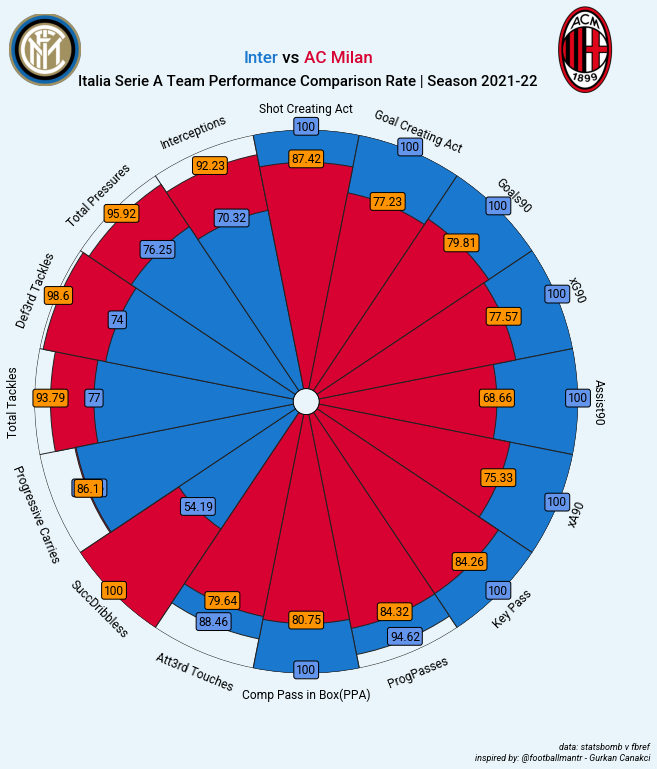

In [68]:
# parameter and values list
# The values are taken from the excellent fbref website (supplied by StatsBomb)
params = [
    "Shot Creating Act", "Goal Creating Act", "Goals90",
    "xG90","Assist90","xA90", "Key Pass","ProgPasses","Comp Pass in Box(PPA)" ,"Att3rd Touches","SuccDribbless","Progressive Carries",
    "Total Tackles","Def3rd Tackles","Total Pressures","Interceptions",
   
]
values = [100,100, 100,100, 100,100,100,94.62,100,88.46,54.19,85.66,77,74,76.25,70.32]    # for Hakan Calhanoglu
values_2 = [87.42,77.23,79.81,77.57,68.66,75.33,84.26,84.32,80.75,79.64,100,86.10,93.79,98.6,95.92,92.23]  # for Lorenzo Pellegrini

# instantiate PyPizza class
baker = PyPizza(
    params=params,                  # list of parameters
    background_color="#e9f5fa",     # background color
    straight_line_color="#222222",  # color for straight lines
    straight_line_lw=1,             # linewidth for straight lines
    last_circle_lw=1,               # linewidth of last circle
    last_circle_color="#222222",    # color of last circle
    other_circle_ls="-.",           # linestyle for other circles
    other_circle_lw=1               # linewidth for other circles
)

# plot pizza
fig, ax = baker.make_pizza(
    values,                     # list of values
    compare_values=values_2,    # comparison values
    figsize=(10, 10),             # adjust figsize according to your need
    kwargs_slices=dict(
        facecolor="#1A78CF", edgecolor="#222222",
        zorder=2, linewidth=1
    ),                          # values to be used when plotting slices
    kwargs_compare=dict(
        facecolor="#d70232", edgecolor="#222222",
        zorder=2, linewidth=1,
    ),
    kwargs_params=dict(
        color="#000000", fontsize=12,
        fontproperties=font_normal.prop, va="center"
    ),                          # values to be used when adding parameter
    kwargs_values=dict(
        color="#000000", fontsize=12,
        fontproperties=font_normal.prop, zorder=3,
        bbox=dict(
            edgecolor="#000000", facecolor="cornflowerblue",
            boxstyle="round,pad=0.2", lw=1
        )
    ),                          # values to be used when adding parameter-values labels
    kwargs_compare_values=dict(
        color="#000000", fontsize=12, fontproperties=font_normal.prop, zorder=3,
        bbox=dict(edgecolor="#000000", facecolor="#FF9300", boxstyle="round,pad=0.2", lw=1)
    ),                          # values to be used when adding parameter-values labels
)

# add title
fig_text(
    0.515, 0.99, "<Inter> vs <AC Milan>", size=17, fig=fig,
    highlight_textprops=[{"color": '#1A78CF'}, {"color": '#d70232'}],
    ha="center", fontproperties=font_bold.prop, color="#000000"
)

# add subtitle
fig.text(
    0.515, 0.942,
    "Italia Serie A Team Performance Comparison Rate | Season 2021-22",
    size=15,
    ha="center", fontproperties=font_bold.prop, color="#000000"
)

# add credits
CREDIT_1 = "data: statsbomb v fbref"
CREDIT_2 = "inspired by: @footballmantr - Gurkan Canakci"

fig.text(
    0.99, 0.005, f"{CREDIT_1}\n{CREDIT_2}", size=9,
    fontproperties=font_italic.prop, color="#000000",
    ha="right"
)

ax_image = add_image(
    fdj_cropped, fig, left=0.1, bottom=0.9315, width=0.1, height=0.12
)   # these values might differ when you are plotting

ax_image = add_image(
    fdj_croppedb, fig, left=0.85, bottom=0.9315, width=0.1, height=0.12
)   # these values might differ when you are plotting



plt.show()

### I compared the offensive and defensive data of Milan and Inter teams using data visualization. 
#### The figure with the highest value in the analysis graph is shown as a percentage.

### Comment on Inter team 
#### According to the analysis results, Inter is the best team with the highest goal percentage, goal scoring percentage, and goal expectation .
#### In addition, the team with the highest value in assists and key pass data is Inter. 


### Comment on Milan team

#### On the other hand, Milan is one of the best teams in terms of total pressure, tackle and interceptions among the teams. 
#### Milan is in first place among Serie A teams in successful dribbling data. He has a serious advantage in dribbling data against Inter.

#### We can state that especially the defensive pressure and tackles-interceptions aspects of the Milan team is effective in becoming the Serie A Champion.